# Expected histogram

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

dict_natural = {'spa':"Natural", 'eng':"Natural"}
dict_adversarial = {'spa':"Adversa", 'eng':"Adversarial"}
dict_threshold = {'spa':"Umbral "+r"$f_{T}$", 'eng':"Threshold "+r"$f_{T}$"}
dict_n_imgs = {'spa':"Número de imágenes", 'eng':"Number of images"}
dict_fr = {'spa':r"$f_{r}$", 'eng':r"$f_{r}$"}

dict_rho = {'spa':r"$\rho_{adv}$", 'eng':r"$\rho_{adv}$"}
dict_ROCAUC = {'spa':r"ROC-AUC(val)", 'eng':r"ROC-AUC(val)"}
lang = 'spa'

path_gen_data = "../Codes/gen_data/"
path_graphs = "./graphs/"

[]

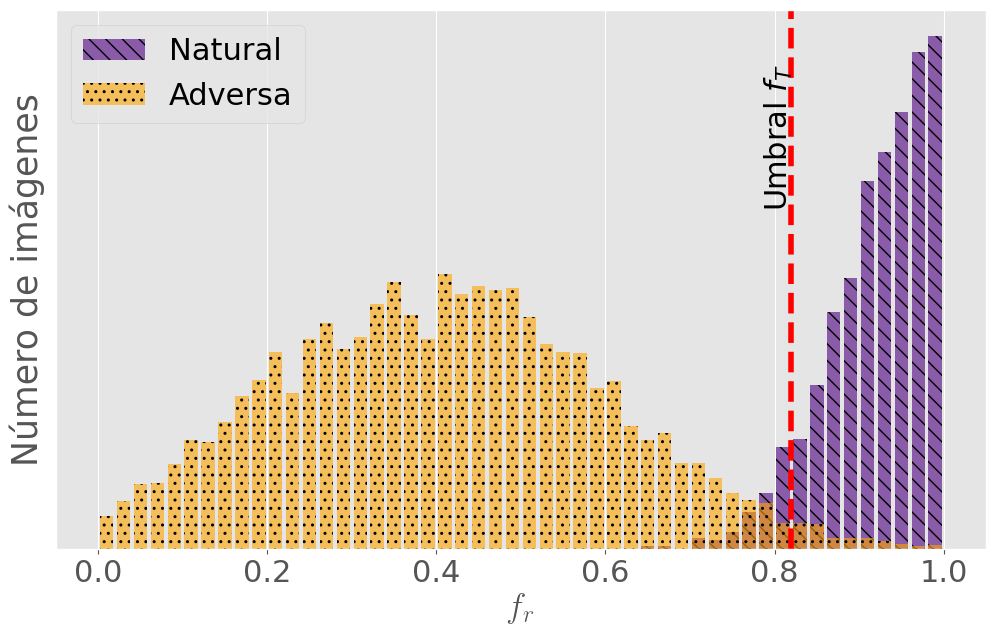

In [5]:
path_hist_save = path_graphs + "expected_histogram.pdf"

hist_colorNat = (0.3,0,0.51,1.0)
hist_colorAdv = (1,0.65,0,1.0)
hist_hatchNat = 2*'\\'
hist_hatchAdv = 2*'.'

nbImgs = 5000
thresh = 0.82
muNat = 1
sigmaNat = 0.1
nat = sigmaNat * np.random.randn(nbImgs) + muNat
muAdv = 0.4
sigmaAdv = 0.2
adv = sigmaAdv * np.random.randn(nbImgs) + muAdv

#generar variables para luego ploter con np.bar (me gustó más) y no con np.hist
natHist, natBins = np.histogram(nat, 50, range=(0,1))
advHist, advBins = np.histogram(adv, natBins, range=(0,1))
binWidth = (natBins[1] - natBins[0])
barWidth = 0.8 * binWidth

#plotear histograma
fig, ax = plt.subplots(1,figsize=(12,7))
ax.set_xlim([-0.05,1.05])
ax.bar(natBins[:-1]+binWidth/2, natHist, width=barWidth, align='center', color=hist_colorNat, fc=hist_colorNat, label=dict_natural[lang], hatch=hist_hatchNat, alpha = 0.6)
ax.bar(advBins[:-1]+binWidth/2, advHist, width=barWidth, align='center', color=hist_colorAdv, fc=hist_colorAdv, label=dict_adversarial[lang], hatch=hist_hatchAdv, alpha= 0.6)
ax.set_xlabel(dict_fr[lang],fontsize = 25, usetex=True)
ax.set_ylabel(dict_n_imgs[lang], fontsize = 25)
ax.legend(loc='best', fontsize=22)
ax.axvline(x=thresh, color='r', linestyle='dashed', linewidth=4)
ax.text(0.76, 0.9, dict_threshold[lang], va="top", fontsize = 22, transform=ax.transAxes, rotation=90)
ax.tick_params(axis='both', labelsize=22)
ax.set_yticks([])
# fig.savefig(path_hist_save,bbox_inches="tight", pad_inches=0)